# Tidy3D mode solver

Tidy3d comes with an open source FDFD [mode solver](https://docs.flexcompute.com/projects/tidy3d/en/latest/notebooks/ModeSolver.html)

## Waveguides

Guided Electromagnetic modes are the ones that have an effective index larger than the cladding of the waveguide

Here is a waveguide of Silicon (n=3.4) surrounded by SiO2 (n=1.44) cladding

For a 220 nm height x 450 nm width the effective index is 2.466

In [1]:
try:
    import google.colab

    is_running_on_colab = True
    !pip install gdsfactory gplugins[tidy3d] > /dev/null
    !apt install python3-gmsh gmsh > /dev/null

except ImportError:
    is_running_on_colab = False

In [2]:
import numpy as np
import gplugins.tidy3d as gt
import matplotlib.pyplot as plt
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

nm = 1e-3

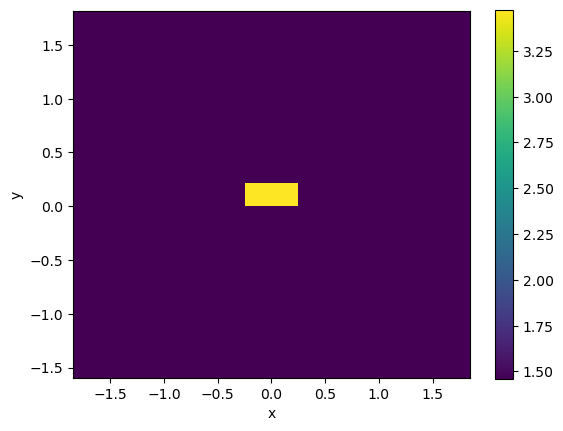

In [3]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
)
strip.plot_index()

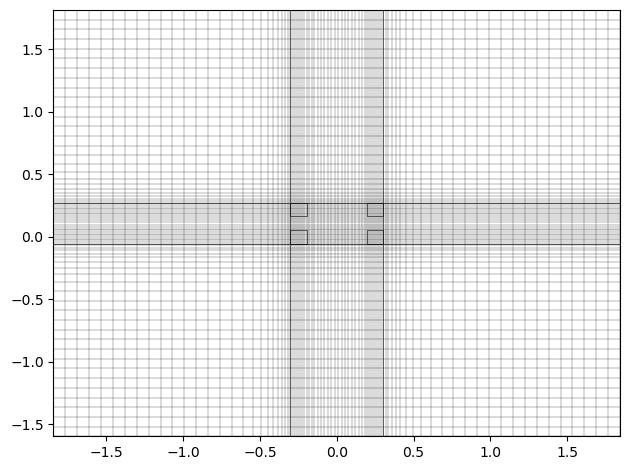

In [4]:
strip.plot_grid()

22:39:11 Iran Standard Time WARNING: The group index was not computed. To       
                            calculate group index, pass 'group_index_step =     
                            True' in the 'ModeSpec'.                            

2024-08-02 22:39:11.127 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_19543a850ab9698a.npz.


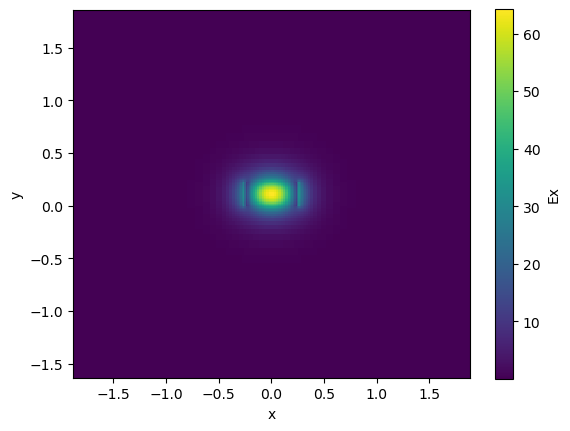

In [5]:
strip.plot_field(field_name="Ex", mode_index=0)  # TE

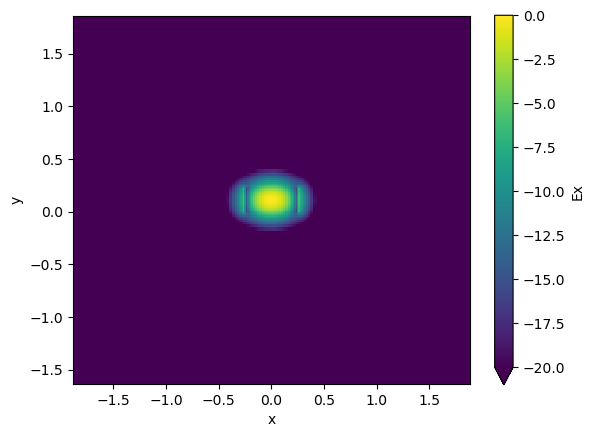

In [6]:
strip.plot_field(field_name="Ex", mode_index=0, value="dB")  # TE

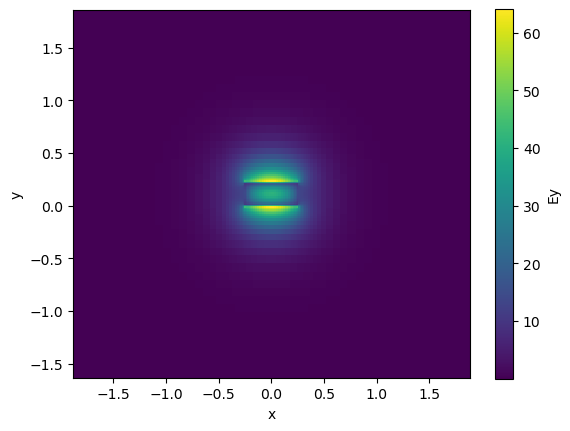

In [7]:
strip.plot_field(field_name="Ey", mode_index=1)  # TM

In [8]:
strip.n_eff

array([2.51134734+4.42777628e-05j, 1.86463643+2.09422901e-04j])

22:39:12 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            1 does not decay at the plane boundaries.           

2024-08-02 22:39:12.808 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_c1bb0fd3a45d0c21.npz.


array([2.67427418+3.10179974e-05j, 2.50854926+4.47861069e-05j])

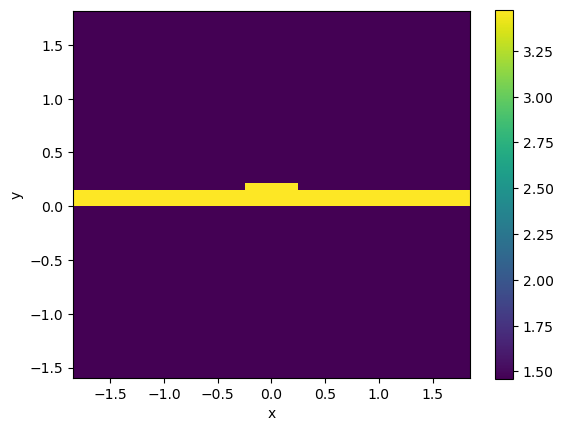

In [9]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_index()
rib.n_eff

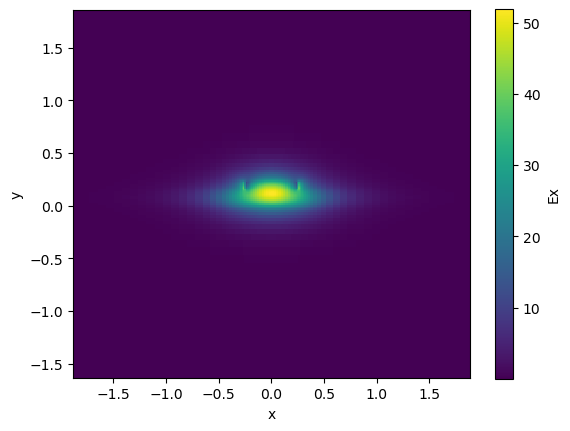

In [10]:
rib.plot_field(field_name="Ex", mode_index=0)  # TE

2024-08-02 22:39:13.941 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_934d68bb49487ad0.npz.


array([1.64461788+8.05914279e-05j, 1.57796343+1.42713228e-04j])

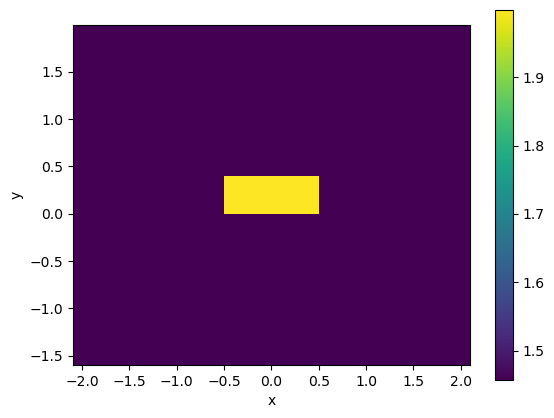

In [11]:
nitride = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    core_material="sin",
    clad_material="sio2",
)
nitride.plot_index()
nitride.n_eff

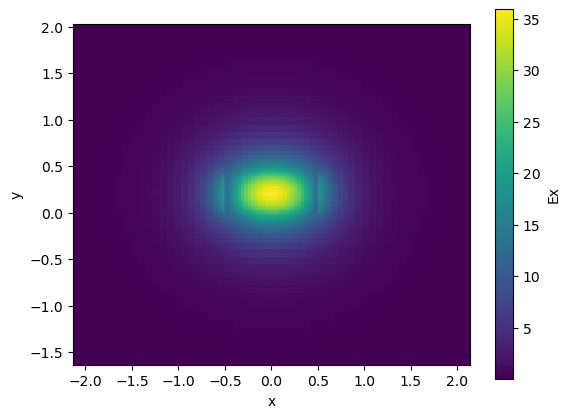

In [12]:
nitride.plot_field(field_name="Ex", mode_index=0)  # TE

## Sweep width

You can sweep the waveguide width and compute the modes.

By increasing the waveguide width, the waveguide supports many more TE and TM modes. Where TE modes have a dominant Ex field and TM modes have larger Ey fields.

Notice that waveguides wider than 0.450 um support more than one TE mode. Therefore the maximum width for single mode operation is 0.450 um.


  0%|          | 0/7 [00:00<?, ?it/s]

22:39:15 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            3 does not decay at the plane boundaries.           

2024-08-02 22:39:15.741 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_3511268d7daddee1.npz.


22:39:17 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            3 does not decay at the plane boundaries.           

2024-08-02 22:39:17.392 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_2a00b9502e42f4e5.npz.
2024-08-02 22:39:19.130 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_fed09f052b30c054.npz.
2024-08-02 22:39:20.346 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_e6e49f39bb015e10.npz.
2024-08-02 22:39:21.564 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_d691e5b721ec80b1.npz.
2024-08-02 22:39:22.725 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_beec5792561cb398.npz.
2024-08-02 22:39:23.763 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_2e7d95dfed472987.npz.


  0%|          | 0/7 [00:00<?, ?it/s]

2024-08-02 22:39:23.788 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_3511268d7daddee1.npz.
2024-08-02 22:39:23.798 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_2a00b9502e42f4e5.npz.
2024-08-02 22:39:23.808 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_fed09f052b30c054.npz.
2024-08-02 22:39:23.817 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_e6e49f39bb015e10.npz.
2024-08-02 22:39:23.826 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_d691e5b721ec80b1.npz.
2024-08-02 22:39:23.835 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:\Users\sajadi\.gdsfactory\modes\Waveguide_beec5792561cb398.npz.
2024-08-02 22:39:23.844 | INFO     | gplugins.tidy3d.modes:_data:265 - load data from C:

Text(0.5, 1.0, 'Effective index sweep')

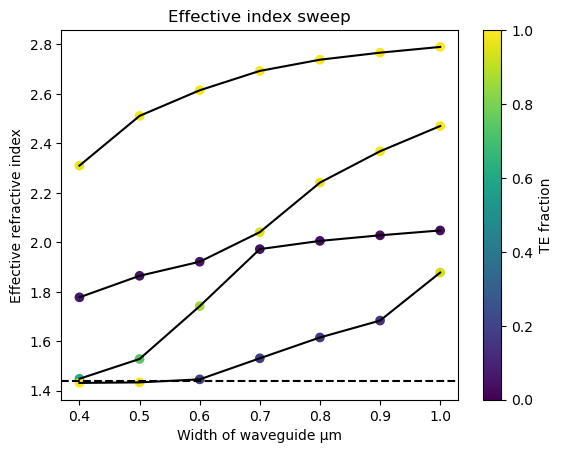

In [13]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
)
w = np.linspace(400 * nm, 1000 * nm, 7)
n_eff = gt.modes.sweep_n_eff(strip, core_width=w)
fraction_te = gt.modes.sweep_fraction_te(strip, core_width=w)

for i in range(4):
    plt.plot(w, n_eff.sel(mode_index=i).real, c="k")
    plt.scatter(
        w, n_eff.sel(mode_index=i).real, c=fraction_te.sel(mode_index=i), vmin=0, vmax=1
    )
plt.axhline(y=1.44, color="k", ls="--")
plt.colorbar().set_label("TE fraction")
plt.xlabel("Width of waveguide µm")
plt.ylabel("Effective refractive index")
plt.title("Effective index sweep")

**Exercises**

- What is the maximum width to support a single TE mode at 1310 nm?
- For a Silicon Nitride (n=2) 400nm thick waveguide surrounded by SiO2 (n=1.44), what is the maximum width to support a single TE mode at 1550 nm?
- For two 500x220nm Silicon waveguides surrounded by SiO2, what is the coupling length (100% coupling) for 200 nm gap?


## Group index

You can also compute the group index for a waveguide.

In [14]:
nm = 1e-3

strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
    group_index_step=10 * nm,
)
print(strip.n_group)

22:39:28 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            3 does not decay at the plane boundaries.           

                            WARNING: Mode field at frequency index 1, mode index
                            3 does not decay at the plane boundaries.           

                            WARNING: Mode field at frequency index 2, mode index
                            3 does not decay at the plane boundaries.           

2024-08-02 22:39:28.778 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_fc23a80bcb73ecac.npz.
[4.17803969 4.08299706 2.71577378 1.50332985]


## Bend modes

You can compute bend modes specifying the bend radius.

22:39:30 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            1 does not decay at the plane boundaries.           

2024-08-02 22:39:30.105 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_9f539282f217e598.npz.


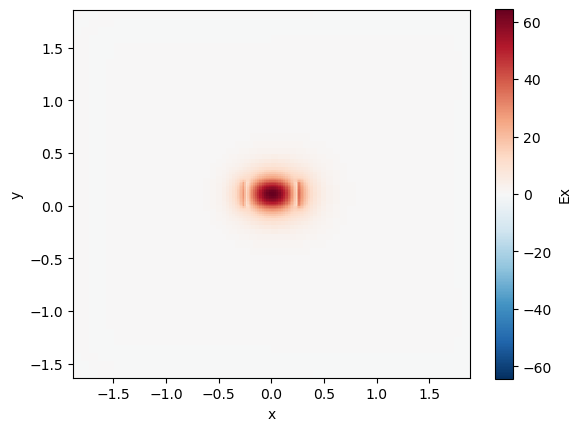

In [15]:
strip_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    slab_thickness=0.0,
    bend_radius=4,
    core_material="si",
    clad_material="sio2",
)
strip_bend.plot_field(field_name="Ex", mode_index=0)  # TE

## Bend loss

You can also compute the losses coming from the mode mismatch from the bend into a straight waveguide.
To compute the bend loss due to mode mismatch you can calculate the mode overlap of the straight mode and the bent mode.
Because there are two mode mismatch interfaces the total loss due to mode mismatch will be squared (from bend to straight and from straight to bend).

![](https://i.imgur.com/M1Yysdr.png)

[from paper](https://ieeexplore.ieee.org/ielaam/50/8720127/8684870-aam.pdf)

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0, 0.5, 'Mismatch (dB)')

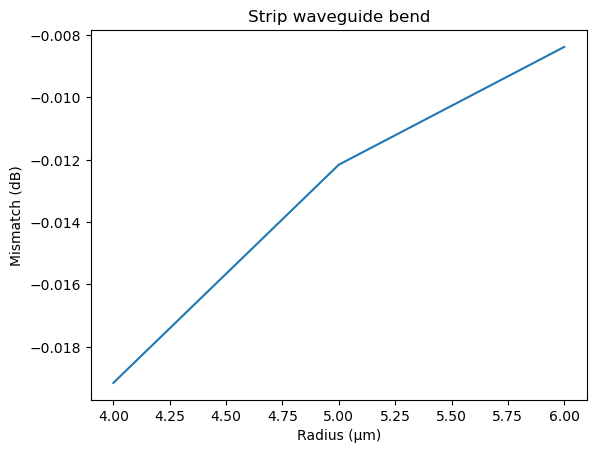

In [16]:
radii = np.arange(4, 7)
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

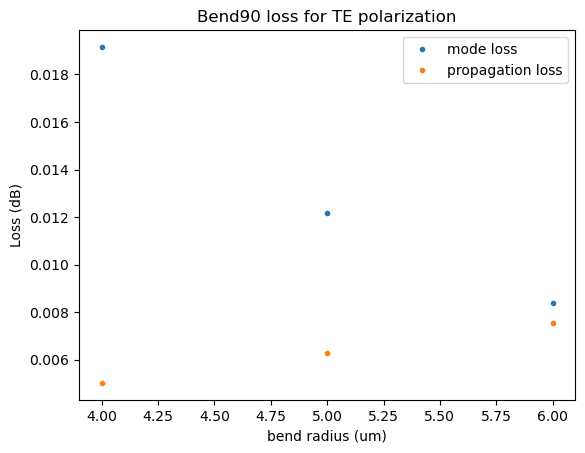

In [17]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

22:39:36 Iran Standard Time WARNING: Mode field at frequency index 0, mode index
                            1 does not decay at the plane boundaries.           

2024-08-02 22:39:36.646 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_8264074b38445db9.npz.


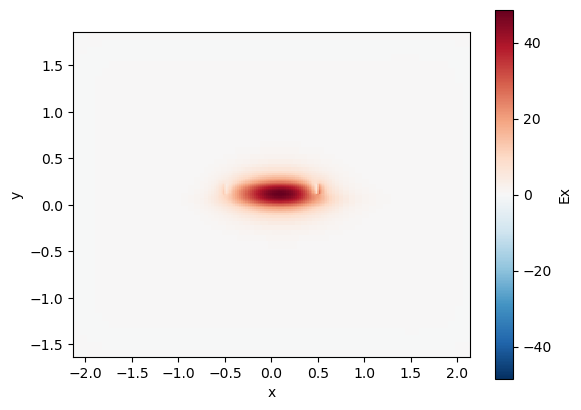

In [18]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=220 * nm,
    slab_thickness=110 * nm,
    bend_radius=15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_field(field_name="Ex", mode_index=0)  # TE

2024-08-02 22:39:39.009 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\Waveguide_2eb37f786f656892.npz.


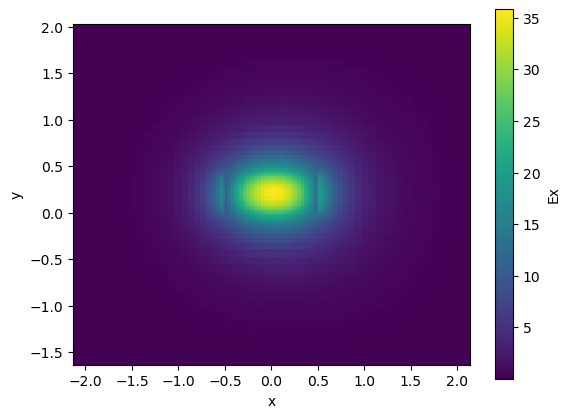

In [19]:
nitride_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    bend_radius=30,
    core_material="sin",
    clad_material="sio2",
)
nitride_bend.plot_field(field_name="Ex", mode_index=0, value="abs")  # TE

In [20]:
radii = np.array([30, 35, 40])
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    core_material="sin",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

  0%|          | 0/3 [00:00<?, ?it/s]

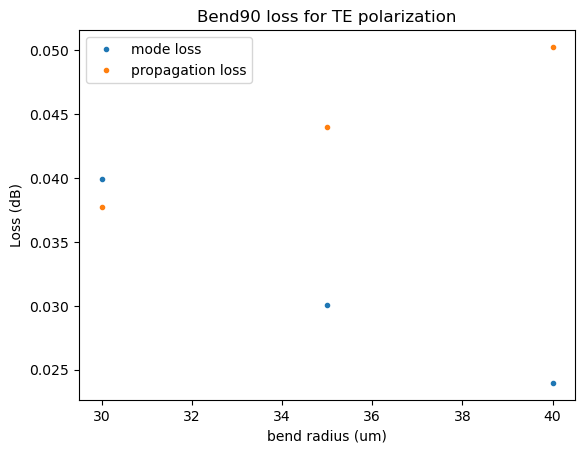

In [21]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

**Exercises**

- For a 500nm wide 220nm thick Silicon waveguide surrounded by SiO2, what is the minimum bend radius to have less than 0.04dB loss for TE polarization at 1550nm?
- For a 500nm wide 220nm thick Silicon waveguide surrounded by SiO2, what is the minimum bend radius to have 99% power transmission for TM polarization at 1550nm?

## Waveguide coupler

You can also compute the modes of a waveguide coupler.

```
       ore_width[0]  core_width[1]
        <------->     <------->
         _______       _______   _
        |       |     |       | |
        |       |     |       |
        |       |_____|       | | core_thickness
        |slab_thickness       |
        |_____________________| |_
                <----->
                  gap


```

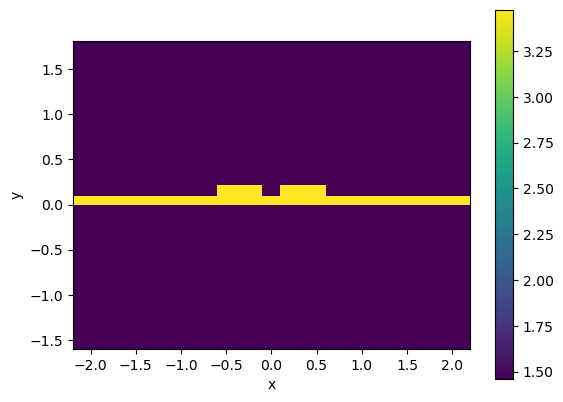

In [22]:
c = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(500 * nm, 500 * nm),
    gap=200 * nm,
    core_thickness=220 * nm,
    slab_thickness=100 * nm,
    core_material="si",
    clad_material="sio2",
)
c.plot_index()

2024-08-02 22:39:48.360 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_73a56550e0176d09.npz.


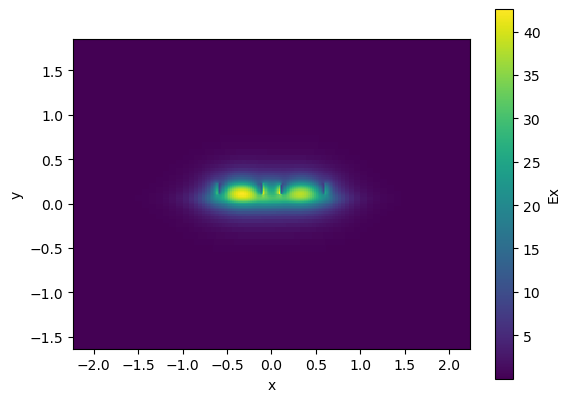

In [23]:
c.plot_field(field_name="Ex", mode_index=0)  # TE

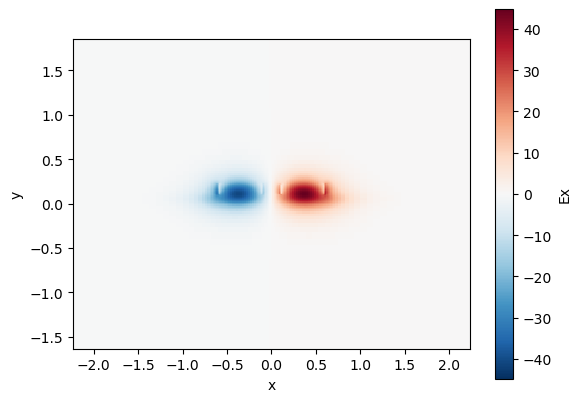

In [24]:
c.plot_field(field_name="Ex", mode_index=1)  # TE


Coupler: WaveguideCoupler(wavelength=array(1.55), core_width=['0.45', '0.45'], core_thickness='0.22', core_material='si', clad_material='sio2', box_material=None, slab_thickness='0.0', clad_thickness=None, box_thickness=None, side_margin=None, sidewall_angle='0.0', sidewall_thickness='0.0', sidewall_k='0.0', surface_thickness='0.0', surface_k='0.0', bend_radius=None, num_modes='4', group_index_step='False', precision='double', grid_resolution='20', max_grid_scaling='1.2', cache_path='C:\\Users\\sajadi\\.gdsfactory\\modes', overwrite='False', gap='0.1')
2024-08-02 22:39:50.124 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_3e52317ae82bf449.npz.
Effective indices: [2.4637647 +6.57552457e-05j 2.39007229+5.06214923e-05j
 1.9225165 +1.99036730e-04j 1.71420814+2.37015946e-04j]
Mode areas: [0.31003254 0.33258301 0.57286555 0.59002858]
Coupling length: [10.5166863   3.72044606]


  0%|          | 0/11 [00:00<?, ?it/s]

2024-08-02 22:39:51.425 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_355fb24383ddaaf3.npz.
2024-08-02 22:39:52.722 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_ae41ac419fb4ef50.npz.
2024-08-02 22:39:53.974 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_a77bfe7e7fd3f52c.npz.
2024-08-02 22:39:55.266 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_56a87a6781d6ec8a.npz.
2024-08-02 22:39:56.569 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_c6be97a332232d90.npz.
2024-08-02 22:39:57.800 | INFO     | gplugins.tidy3d.modes:_data:305 - store data into C:\Users\sajadi\.gdsfactory\modes\WaveguideCoupler_aff3ecf7033d14f1.npz.
2024-08-02 22:39:59.152 | INFO     | gpl

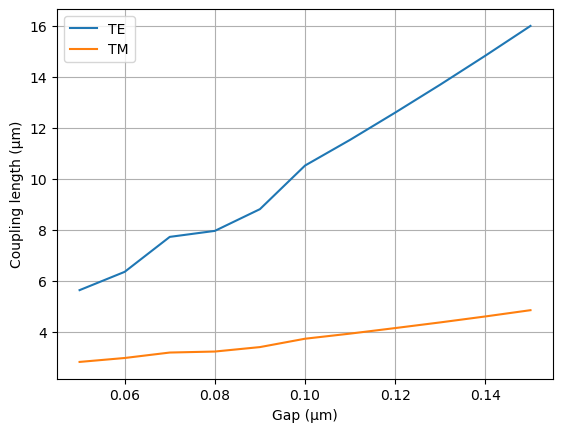

In [25]:
coupler = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(450 * nm, 450 * nm),
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=4,
    gap=0.1,
)

print("\nCoupler:", coupler)
print("Effective indices:", coupler.n_eff)
print("Mode areas:", coupler.mode_area)
print("Coupling length:", coupler.coupling_length())

gaps = np.linspace(0.05, 0.15, 11)
lengths = gt.modes.sweep_coupling_length(coupler, gaps)

_, ax = plt.subplots(1, 1)
ax.plot(gaps, lengths)
ax.set(xlabel="Gap (μm)", ylabel="Coupling length (μm)")
ax.legend(["TE", "TM"])
ax.grid()